<img src="img/python-logo-notext.svg"
     style="display:block;margin:auto;width:10%"/>
<h1 style="text-align:center;">Python: Pandas Series</h1>
<h2 style="text-align:center;">Coding Akademie München GmbH</h2>
<br/>
<div style="text-align:center;">Dr. Matthias Hölzl</div>
<div style="text-align:center;">Allaithy Raed</div>


# Der Typ `Series`

Der Pandas Typ `Series` repräsentiert eine Folge von Werten, die ähnlich wie eine Python Liste numerisch indiziert werden kann, gleichzeitig aber auch einen semantisch sinnvollerern Index haben kann, z.B. Daten für Zeitreihen.

Intern wird ein `Series`-Objekt durch ein NumPy Array realisiert, daher sind die meisten Operationen von NumPy Arrays auch auf Pandas-`Series`-Objekte anwendbar.

In [114]:
import numpy as np
import pandas as pd

## Erzeugen von Serien

### Aus Listen

In [115]:
pd.Series(data=[10, 20, 30, 40])

0    10
1    20
2    30
3    40
dtype: int64

In [116]:
pd.Series(['a', 'b', 'c'])

0    a
1    b
2    c
dtype: object

### Aus Listen mit Index

In [117]:
pd.Series(data=[1, 2, 3, 4], index=['w', 'x', 'y', 'z'])

w    1
x    2
y    3
z    4
dtype: int64

### Aus NumPy Arrays

In [118]:
arr = np.arange(5)
indices = 'a b c d e'.split()

In [119]:
pd.Series(data=arr)

0    0
1    1
2    2
3    3
4    4
dtype: int32

In [120]:
pd.Series(arr, index=indices)

a    0
b    1
c    2
d    3
e    4
dtype: int32

### Aus Dictionary

In [121]:
pd.Series(data={'Ice Cream':2.49, 'Cake': 4.99, 'Fudge': 7.99})

Ice Cream    2.49
Cake         4.99
Fudge        7.99
dtype: float64

## Indizes und Operationen

In [122]:
food1 = pd.Series({'Ice Cream':2.49, 'Cake': 4.99, 'Fudge': 7.99})
food2 = pd.Series({'Cake': 4.99, 'Ice Cream':3.99, 'Pie': 3.49, 'Cheese': 1.99})

In [123]:
food1

Ice Cream    2.49
Cake         4.99
Fudge        7.99
dtype: float64

In [154]:
food1.index

Index(['Ice Cream', 'Cake', 'Fudge'], dtype='object')

In [159]:
food1.size

3

In [160]:
food1.sum()

15.47

In [161]:
food1.mean()

5.156666666666667

In [125]:
food1.name

In [126]:
food1.name = 'Deserts'

In [127]:
food1.name

'Deserts'

In [128]:
food1

Ice Cream    2.49
Cake         4.99
Fudge        7.99
Name: Deserts, dtype: float64

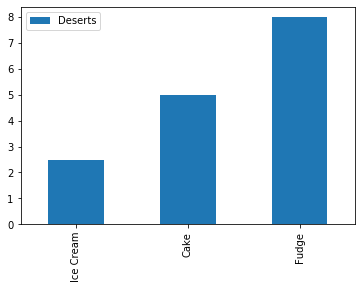

In [129]:
food1.plot.bar(legend=True);

In [130]:
food1['Cake']

4.99

In [164]:
# Error!
# food1['Pie']

In [165]:
food1.argmin()

0

In [166]:
food1[0]

2.49

In [169]:
food_sum = food1 + food2
food_sum

Cake         9.98
Cheese        NaN
Fudge         NaN
Ice Cream    6.48
Pie           NaN
dtype: float64

In [133]:
food1 + 0.5

Ice Cream    2.99
Cake         5.49
Fudge        8.49
Name: Deserts, dtype: float64

In [134]:
food1

Ice Cream    2.49
Cake         4.99
Fudge        7.99
Name: Deserts, dtype: float64

In [135]:
def discount(price):
    return price * 0.9

food1.apply(discount)

Ice Cream    2.241
Cake         4.491
Fudge        7.191
Name: Deserts, dtype: float64

In [136]:
food1

Ice Cream    2.49
Cake         4.99
Fudge        7.99
Name: Deserts, dtype: float64

In [137]:
food1.apply(lambda price: price * 0.9)

Ice Cream    2.241
Cake         4.491
Fudge        7.191
Name: Deserts, dtype: float64

In [142]:
food1.append(pd.Series({'Chocolate': 3.99}))

Ice Cream    2.49
Cake         4.99
Fudge        7.99
Chocolate    3.99
dtype: float64

In [143]:
food1

Ice Cream    2.49
Cake         4.99
Fudge        7.99
Name: Deserts, dtype: float64

In [ ]:
all_food = food1.append(food2)

In [185]:
all_food

Ice Cream    2.49
Cake         4.99
Fudge        7.99
Cake         4.99
Ice Cream    3.99
Pie          3.49
Cheese       1.99
dtype: float64

### Mehrfach vorkommende Index-Werte

In [186]:
all_food.index

Index(['Ice Cream', 'Cake', 'Fudge', 'Cake', 'Ice Cream', 'Pie', 'Cheese'], dtype='object')

In [208]:
all_food.is_unique

False

In [209]:
food1.is_unique

True

In [187]:
all_food['Cake']

Cake    4.99
Cake    4.99
dtype: float64

In [188]:
type(all_food['Cake'])

pandas.core.series.Series

In [189]:
all_food['Pie']

3.49

In [190]:
type(all_food['Pie'])

numpy.float64

In [210]:
all_food.groupby(all_food.index).max()

Cake         4.99
Cheese       1.99
Fudge        7.99
Ice Cream    3.99
Pie          3.49
dtype: float64

### Sortierte und unsortierte Indizes

In [212]:
all_food.index.is_monotonic_increasing

False

In [214]:
sorted_food = all_food.sort_index()

In [217]:
sorted_food

Cake         4.99
Cake         4.99
Cheese       1.99
Fudge        7.99
Ice Cream    2.49
Ice Cream    3.99
Pie          3.49
dtype: float64

In [219]:
sorted_food.index.is_monotonic_increasing

True

In [220]:
all_food.sort_values()

Cheese       1.99
Ice Cream    2.49
Pie          3.49
Ice Cream    3.99
Cake         4.99
Cake         4.99
Fudge        7.99
dtype: float64

In [221]:
all_food.sort_values().is_monotonic_increasing

True

In [194]:
all_food[['Pie', 'Cake']]

Pie     3.49
Cake    4.99
Cake    4.99
dtype: float64

In [195]:
all_food

Ice Cream    2.49
Cake         4.99
Fudge        7.99
Cake         4.99
Ice Cream    3.99
Pie          3.49
Cheese       1.99
dtype: float64

In [197]:
all_food[1:3]

Cake     4.99
Fudge    7.99
dtype: float64

In [204]:
# all_food['Cake':'Fudge']

In [224]:
sorted_food['Cake':'Fudge']

Cake      4.99
Cake      4.99
Cheese    1.99
Fudge     7.99
dtype: float64

**Beachte:** Der obere Slice-Wert `'Fudge'` ist im Ergebnis enthalten!

## Nicht vorhandene Werte

In [ ]:
food = food1 + food2

In [ ]:
food.isna()

In [ ]:
food.isna().sum()

In [ ]:
food.dropna()